# Spatio-Temporal Transfer Function of a Rectangular Room

*This Jupyter notebook is part of a [collection of notebooks](../index.ipynb) in the masters course Selected Topics in Audio Signal Processing, Communications Engineering, Universität Rostock. Please direct questions and suggestions to [Sascha.Spors@uni-rostock.de](mailto:Sascha.Spors@uni-rostock.de).*

## Theory

The transfer function of a point source placed in a rectangular room $V$ with rigid walls can be derived by formulating the problem in Cartesian coordinates, exploiting the separability of the wave equation and solving the separated problems for the rigid boundary conditions. For a point source at the position $\mathbf{x}_0 \in V$ the sound field at the position $\mathbf{x} \in V$ is given as

\begin{equation}
P(\mathbf{x}, \mathbf{x}_0, \omega) = \frac{8}{L_x L_y L_z}  \;
\sum_{m=0}^{\infty} \sum_{n=0}^{\infty} \sum_{l=0}^{\infty}
\frac{\psi_{m,n,l}(\mathbf{x}) \; \psi_{m,n,l}(\mathbf{x}_0)}
{(\frac{\omega}{c})^2 - ( k^2_{x,m} + k^2_{y,n} + k^2_{z,l} )}
\end{equation}

where $L_x$, $L_y$ and $L_z$ denote the dimensions of the room in the $x$, $y$ and $z$-direction, respectively. The spatial basis functions $\psi_{m,n,l}(\mathbf{x})$ are defined as

\begin{equation}
\psi_{m,n,l}(\mathbf{x}) = \cos(k_{x,m} \; x) \cdot \cos(k_{y,n} \; y) \cdot \cos(k_{z,l} \; z)
\end{equation}

where

\begin{equation}
k_{x,m} = \frac{m \; \pi}{L_x}, k_{y,n} = \frac{n \; \pi}{L_y}, k_{z,l} = \frac{l \; \pi}{L_z}
\end{equation}

denote the discrete wave numbers in all three room dimensions. The spatial basis functions are also termed as [room modes](https://en.wikipedia.org/wiki/Room_modes). The model can be extended from rigid to nearly rigid boundary conditions by replacing the discrete wave numbers by e.g. $\tilde{k}_{x,m} = k_{x,m} + j \alpha_x$.

## Simulations

The formulas given above have been implemented in the [Sound Field Synthesis Toolbox for Python](https://github.com/sfstoolbox/sfs-python). The function `sfs.mono.source.point_modal` of the Python module `sfs` is used in the following to simulate the transfer function numerically.

### Spatial Transfer Function for a Fixed Source Position and Frequency

The spatial transfer function for a fixed source position $\mathbf{x}_0$ is computed at one horizontal plane for the frequency $f=1000$ Hz.

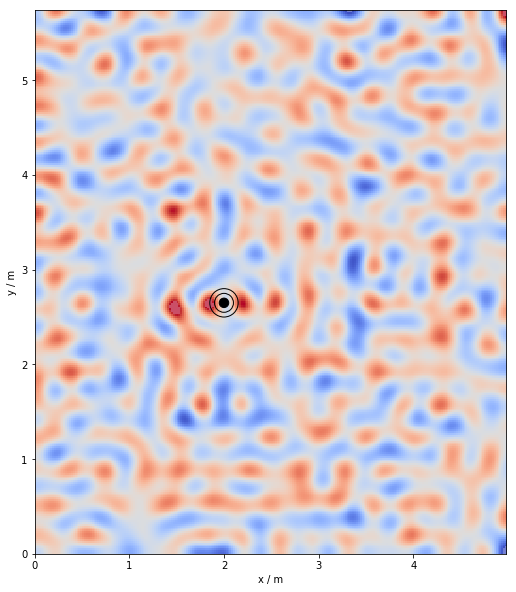

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import sfs

x0 = 2, 2.65, 1.80  # source position
L = 5, 5.75, 3  # dimensions of room
deltan = 0.01  # absorption factor of walls
n0 = 1, 0, 0  # normal vector of source (only for compatibilty)
N = None  # maximum order of all modes
grid = sfs.util.xyz_grid([0, L[0]], [0, L[1]], 1.80, spacing=0.02, endpoint=False)  # spatial grid
om = 2*np.pi*1000  # angular frequency

# compute sound field
P = sfs.mono.source.point_modal(om, x0, n0, grid, L, N=N, deltan=deltan)

# plot sound field (= real part of transfer function) in horizontal plane
plt.figure(figsize=(10, 10))
sfs.plot.soundfield(P, grid, xnorm=[L[0]/2, L[1]/2, 1.80], colorbar=False, vmax=15, vmin=-15)
sfs.plot.virtualsource_2d(x0)

### Impulse Response for Fixed Source Position to the Sound Pressure on a Line

The impulse response from a point source to a line parallel to the $x$-axis is computed by inverse discrete Fourier transform of the respective transfer function. The third sum over the $z$-direction is discarded to lower the computational complexity.

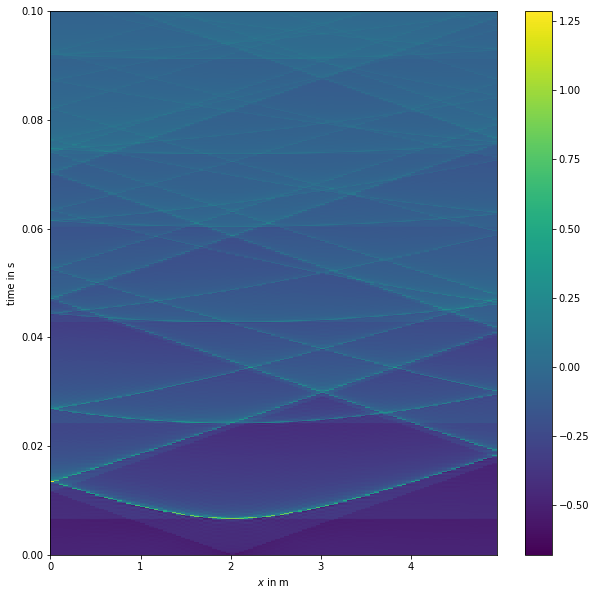

In [2]:
fs = 8000  # sampling frequency
omega = 2*np.pi*np.linspace(0, fs, 2048)  # frequencies for which the transfer function is computed
grid = sfs.util.xyz_grid([0, L[0]], 1.50, 1.80, spacing=0.05, endpoint=False)  # positions on the line
deltan = 0.1  # absorption factor of walls
N = [None, None, [0]]  # maximum order of modes

# compute sound field for given frequencies
P = [sfs.mono.source.point_modal(om, x0, n0, grid, L, N=N, deltan=deltan) for om in omega]
P = np.asarray(P)
# inverse temporal Fourier transform
p = np.fft.irfft(P, axis=0)

# plot field
x, y, z = sfs.util.as_xyz_components(grid)
t = 1/fs * np.arange(len(p))

plt.figure(figsize=(10,10))
plt.pcolormesh(x, t, -p)
plt.xlabel('$x$ in m')
plt.ylabel('time in s')
plt.ylim([0, 0.1])
plt.colorbar()

### Transfer Function for Fixed Source Position and Field Point

The transfer function between the point source and a fixed position in the room is computed and its magnitude plotted. The frequency range was limited due to the numerical complexity when evaluating all three sums above.

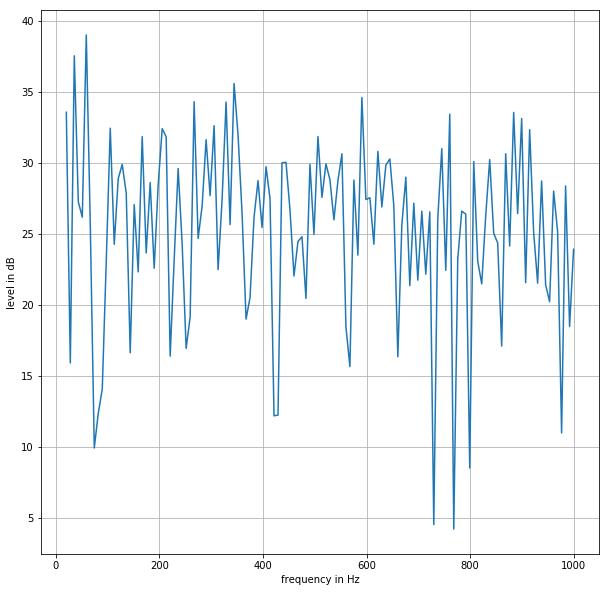

In [3]:
f = np.linspace(20, 1000, 128)  # frequencies
omega = 2 * np.pi * f  # angular frequency
grid = sfs.util.xyz_grid(1.5, 1, 1.80, spacing=1)  # fixed field point
deltan = 0.01  # absorption factor for walls
N = None  # maximum order of modes

# compute sound field for given frequencies
P = [sfs.mono.source.point_modal(om, x0, n0, grid, L, N=N, deltan=deltan) for om in omega]

# plot magnitude of the transfer function
plt.figure(figsize=(10, 10))
plt.plot(f, 20*np.log10(np.abs(P)))
plt.xlabel('frequency in Hz')
plt.ylabel('level in dB')
plt.grid()

**Copyright**

This notebook is provided as [Open Educational Resources](https://en.wikipedia.org/wiki/Open_educational_resources). Feel free to use the notebook for your own purposes. The text/images/data are licensed under [Creative Commons Attribution 4.0](https://creativecommons.org/licenses/by/4.0/), the code of the IPython examples under the [MIT license](https://opensource.org/licenses/MIT). Please attribute the work as follows: *Sascha Spors, Selected Topics in Audio Signal Processing - Supplementary Material, 2017*.